## Task -  Predict whether a particular customer will repay the loan or not
### Dataset - https://www.kaggle.com/upadorprofzs/credit-risk

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
ds = pd.read_csv("original.csv")

In [3]:
ds.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [4]:
# Checking for null values
ds.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [5]:
# Filling Null Values
ds['age'].fillna(int(ds['age'].mean()), inplace=True)

In [6]:
ds.isnull().sum()

clientid    0
income      0
age         0
loan        0
default     0
dtype: int64

In [7]:
# Dropping these items beacuse they do not serve any purpose and have null values
ds.drop(columns =['clientid'],axis =1,inplace=True)

In [8]:
ds.head()

,income,age,loan,default
0,66155.925095,59.017015,8106.532131,0
1,34415.153966,48.117153,6564.745018,0
2,57317.170063,63.108049,8020.953296,0
3,42709.534201,45.751972,6103.642260,0
4,66952.688845,18.584336,8770.099235,1


In [9]:
ds.shape

(2000, 4)

In [10]:
# Dropping Duplicate Values
ds.drop_duplicates()

,income,age,loan,default
0,66155.925095,59.017015,8106.532131,0
1,34415.153966,48.117153,6564.745018,0
2,57317.170063,63.108049,8020.953296,0
3,42709.534201,45.751972,6103.642260,0
4,66952.688845,18.584336,8770.099235,1
...,...,...,...,...
1995,59221.044874,48.518179,1926.729397,0
1996,69516.127573,23.162104,3503.176156,0
1997,44311.449262,28.017167,5522.786693,1
1998,43756.056605,63.971796,1622.722598,0


In [11]:
# Dependent and Independent Variables
X = ds.iloc[:,:-1] # Independent
y =ds.iloc[:,-1] # Dependent

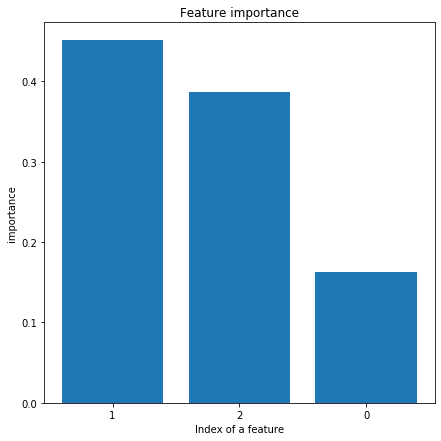

In [13]:
# Feature Importance illustration using random forest
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100)
forest_clf.fit(X, y)

importances = forest_clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(7,7))
plt.bar(range(len(indices)),importances[indices])
plt.xticks(range(len(indices)), indices)
plt.title("Feature importance")
plt.xlabel('Index of a feature')
plt.ylabel('importance')
plt.show()

In [14]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Selection with accuracy score and confusion matrix

In [16]:
# Using Naive Baye
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[430   6]
 [ 25  39]]


0.938

In [17]:
#Using Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[429   7]
 [ 17  47]]


0.952

In [18]:
# Using K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[432   4]
 [  3  61]]


0.986

In [19]:
# Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[432   4]
 [  2  62]]


0.988

In [20]:
# Random Forest 
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[434   2]
 [ 12  52]]


0.972

In [21]:
# Support vector Classifier
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[426  10]
 [ 15  49]]


0.95

## Decision Trees give us 98.8% accurate results for this dataset